In [1]:
# Import necessary libraries
#!pip install tensorflow
#!pip install opencv-python
#!pip install opencv-contrib-python --user
 ## fullpackage
#!pip install matplotlib
#!pip install mumpy
import tensorflow as tf
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

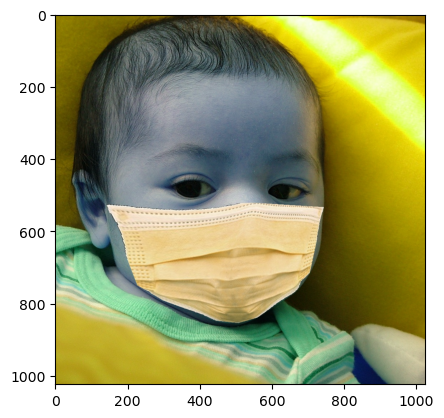

In [2]:
# read an image to see if the drive is mounted properly and the path is specified correctly
try:
    img_array = cv2.imread("DataSet/FaceMask/00000_Mask.jpg")
    if img_array is None:
        print("Error: Image could not be loaded. Check path and file integrity.")
    else:
        plt.imshow(img_array)
        plt.show()
except FileNotFoundError:
    print("Error: Image file not found.")
#plt.imshow(img_array) #bgr

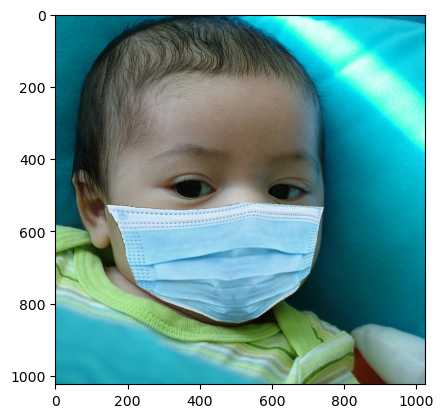

In [3]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [4]:
img_array.shape

(1024, 1024, 3)

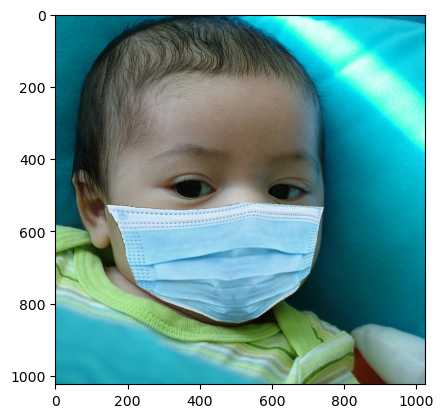

In [5]:
DataDirectory = "DataSet/"
Classes = ['FaceMask','NoMask'] # list of classes
for category in Classes:
    path = os.path.join(DataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb =  cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

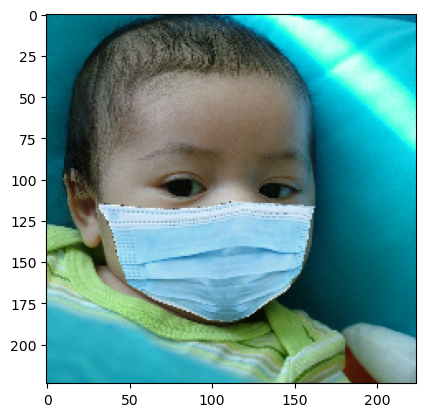

In [6]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
# reading the images and converting all to array

training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(DataDirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
              pass

In [9]:
# create training data by calling function
create_training_data()

In [10]:
print(len(training_data))

1950


In [11]:
# shuflle the data before training
import random
random.shuffle(training_data)

In [12]:
X = [] # data / features
Y = [] # labels

for features, label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [13]:
X.shape

(1950, 224, 224, 3)

In [14]:
# normalize the data
X = X/255.0; # normalize by dividing by the number of pixels

In [15]:
Y[1000]

1

In [16]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.mobilenet.MobileNet() # a pretrained model

In [20]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [21]:
# transfer learning
base_input = model.inputs[0]
base_output = model.layers[-4].output

In [22]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) # 0,1 for sigmoid
final_output = layers.Activation('sigmoid')(final_output)

In [23]:
print(f"Value of base_input: {base_input}")
new_model = keras.Model(inputs = base_input, outputs = final_output)

Value of base_input: <KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor>


In [24]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [25]:
# settings for binary classification (face mask / no mask)
new_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [26]:
Y = np.array(Y) # Convert Y to a NumPy array
new_model.fit(X,Y, epochs = 5, validation_split = 0.1)

Epoch 1/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 349s 6s/step - accuracy: 0.9875 - loss: 0.0267 - val_accuracy: 0.8667 - val_loss: 0.5898
Epoch 2/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 299s 5s/step - accuracy: 1.0000 - loss: 4.0040e-05 - val_accuracy: 0.9949 - val_loss: 0.0060
Epoch 3/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 291s 5s/step - accuracy: 1.0000 - loss: 7.5520e-06 - val_accuracy: 1.0000 - val_loss: 1.2354e-05
Epoch 4/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 293s 5s/step - accuracy: 1.0000 - loss: 4.4100e-05 - val_accuracy: 1.0000 - val_loss: 2.7629e-08
Epoch 5/5
55/55 ━━━━━━━━━━━━━━━━━━━━ 291s 5s/step - accuracy: 1.0000 - loss: 2.9588e-04 - val_accuracy: 1.0000 - val_loss: 1.4732e-06


In [27]:
# for layer in model.layer:
#    layer[].trainable = false

In [28]:
new_model.save('my_model3.h5') # WARNING:absl:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`.
#model.save('my_model.keras')

In [29]:
new_model = tf.keras.models.load_model('my_model3.h5') # WARNING:absl:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.

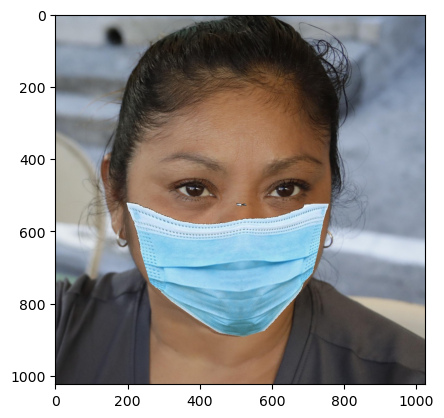

In [30]:
# checking the network for Predictions
frame = cv2.imread('00002_Mask.jpg')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [31]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image, axis = 0) # extra dimention
final_image = final_image/255.0 # normalize

In [32]:
Predictions = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [33]:
Predictions

array([[5.552463e-14]], dtype=float32)

In [34]:
print(f"Prediction for the unmasked face image: {Predictions}") # Corrected variable name

# Interpret the prediction (assuming 0-0.5 is FaceMask, 0.5-1 is NoMask)
# The prediction is a numpy array, so access the value using index [0][0]
if Predictions[0][0] > 0.5:
    status = "No Mask"
else:
    status = "Face Mask"

print(f"Predicted status: {status}")

Prediction for the unmasked face image: [[5.552463e-14]]
Predicted status: Face Mask


In [35]:
frame = cv2.imread('istockphoto.jpg')

In [36]:
frame.shape

(407, 612, 3)

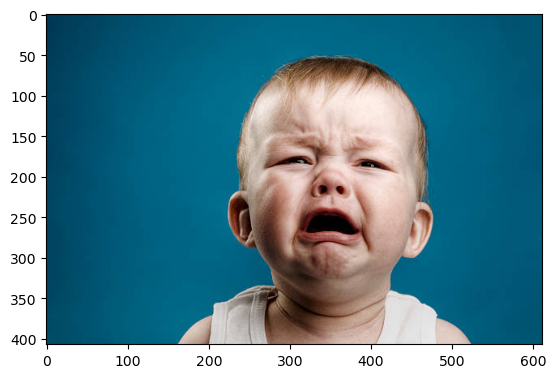

In [37]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [38]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [39]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [40]:
gray.shape

(407, 612)

In [41]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = frame[y:y+h, x:x+w]
  cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
  facess = faceCascade.detectMultiScale(roi_gray)
  if len(facess) == 0:
    print('Face not detected')
  else:
    for (ex,ey,ew,eh) in facess:
      face_roi = roi_color[ey:ey+eh, ex:ex+ew]

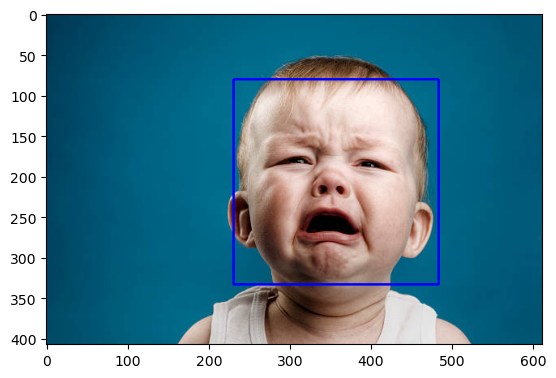

In [42]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

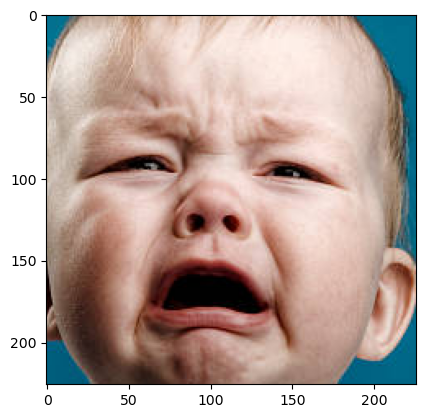

In [43]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [44]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0) # need fourth dimention
final_image = final_image/255.0

In [45]:
Predictions = new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [46]:
Predictions

array([[1.]], dtype=float32)

In [47]:
print(f"Prediction for the unmasked face image: {Predictions}")

# Interpret the prediction (assuming 0-0.5 is FaceMask, 0.5-1 is NoMask)
if Predictions > 0.5:
  status = "No Mask"
else:
  status = "Face Mask"

print(f"Predicted status: {status}")

Prediction for the unmasked face image: [[1.]]
Predicted status: No Mask


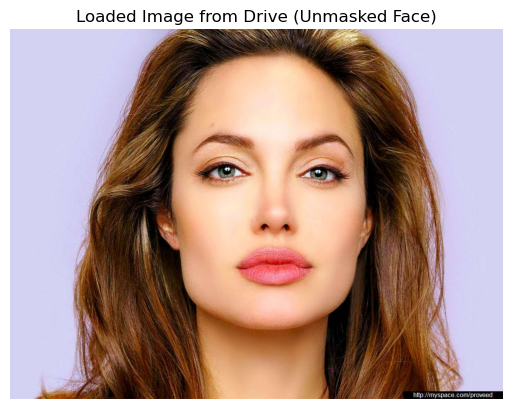

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Prediction for the unmasked face image: [[1.]]
Predicted status: No Mask


In [48]:
#import requests
#from PIL import Image
#from io import BytesIO
#import numpy as np
#import cv2
#from matplotlib import pyplot as plt

try:
    # Load the image from Google Drive
    image_path = 'test.jpg'  # Path to your uploaded image
    frame = cv2.imread(image_path)

    if frame is None:
        print(f"Error: Could not load image from {image_path}. Please check the path.")
    else:
        # Display the loaded image
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title('Loaded Image from Drive (Unmasked Face)')
        plt.axis('off') # Hide axes
        plt.show()

        # Preprocess the image (assuming face detection and cropping are handled later if needed)
        # For simplicity here, we'll resize the whole image to the model's input size
        img_size = 224
        final_image = cv2.resize(frame, (img_size, img_size))
        final_image = np.expand_dims(final_image, axis=0) # Add batch dimension
        final_image = final_image / 255.0 # Normalize

        # Make a prediction using the new_model
        predictions = new_model.predict(final_image)

        print(f"Prediction for the unmasked face image: {predictions}")

        # Interpret the prediction (assuming 0-0.5 is FaceMask, 0.5-1 is NoMask)
        if predictions > 0.5:
            status = "No Mask"
        else:
            status = "Face Mask"

        print(f"Predicted status: {status}")

except Exception as e:
    print(f"An error occurred: {e}")